### Exploring Relationships - Milena Nedyalkova

## 1. Setup Notebook

In [244]:
# Import the libiraties and the cleaned data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [245]:
# File path and name
data_path = r'C:\\Users\\PC\\Desktop\\CareerFoundry Data Analytics\\airport_traffic_2024_clean.csv'
data = pd.read_csv(data_path)

## 2. Exploring relationships 

In [246]:
# Drop the non-European countries from the dataset and remove the unnecessary columns
data = data.drop(data[data['Country'] == 'Morocco'].index)
data = data.drop(data[data['Country'] == 'Israel'].index)

columns_to_drop = ['Unnamed: 0', 'Year']
data = data.drop(columns = columns_to_drop, errors = 'ignore')

In [247]:
# Create new variable to explore the total number of flights on country level
flights_by_country = data.groupby('Country')['Total flights'].sum().reset_index()

In [248]:
# Create new variable to explore the total number of flights on monthly level
flights_by_month = data.groupby('Month Code')['Total flights'].sum().reset_index()

In [249]:
# Calculate the correlation ingroring the non-numeric columns
corr = data.corr(numeric_only=True)
print(corr)

                      Month Code  Number of Departures  Number of Arrivals  \
Month Code              1.000000              0.025916            0.025899   
Number of Departures    0.025916              1.000000            0.999543   
Number of Arrivals      0.025899              0.999543            1.000000   
Total flights           0.025910              0.999886            0.999886   

                      Total flights  
Month Code                 0.025910  
Number of Departures       0.999886  
Number of Arrivals         0.999886  
Total flights              1.000000  


# Correlation matrix heatmap

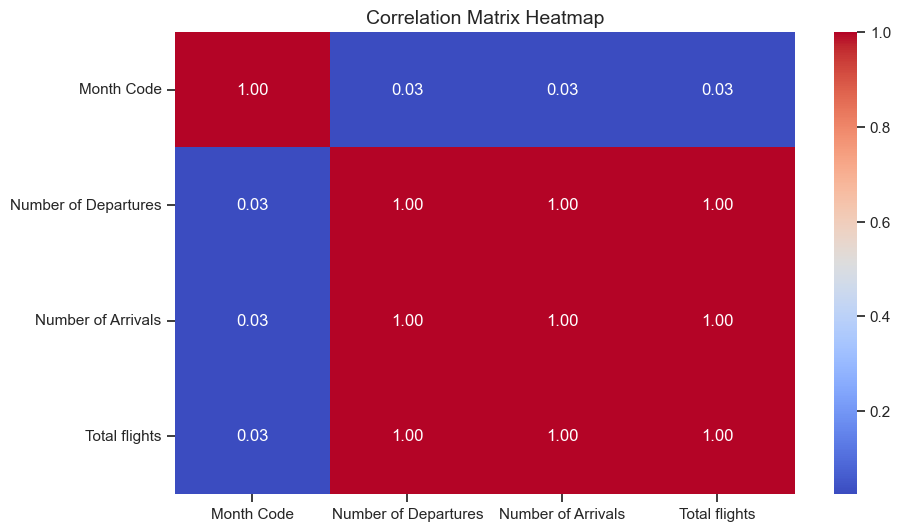

In [250]:
# Plot heatmap using seaborn 

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr, 
    annot=True,       # show correlation values
    cmap='coolwarm',  # color map
    fmt=".2f",        # format for numbers
    cbar=True         # show color bar
)

plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

In [251]:
# Save the visualization 
g.fig.savefig("Correlation Matrix Heatmap.png", dpi=300, bbox_inches="tight")

In [252]:
# Check the current directory
cwd = os.getcwd()
cwd

'C:\\Users\\PC\\Desktop\\CareerFoundry Data Analytics'

The dataset contains only a limited number of numeric columns suitable for quantitative analysis and visualization, such as correlation heatmaps. A very strong correlation is observed between the number of arrivals and the number of departures, indicating that these two measures are closely related.

# Scatterplot

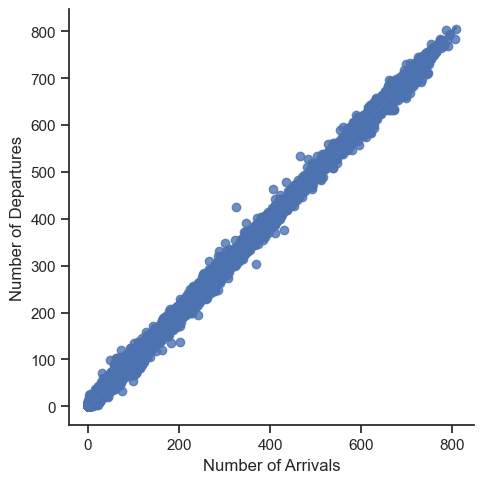

In [253]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'Number of Arrivals', y = 'Number of Departures', data = data)

In [254]:
# Save the visualization 
g.fig.savefig("Correlation DEP ARR.png", dpi=300, bbox_inches="tight")

The strong correlation is further confirmed by the scatterplot, where all points are tightly clustered around the line, indicating a clear linear relationship.

# Pair plot

In [255]:
# Create a sub of the picked values with the strongest correlation
sub = data[['Number of Arrivals','Number of Departures' , 'Total flights']]

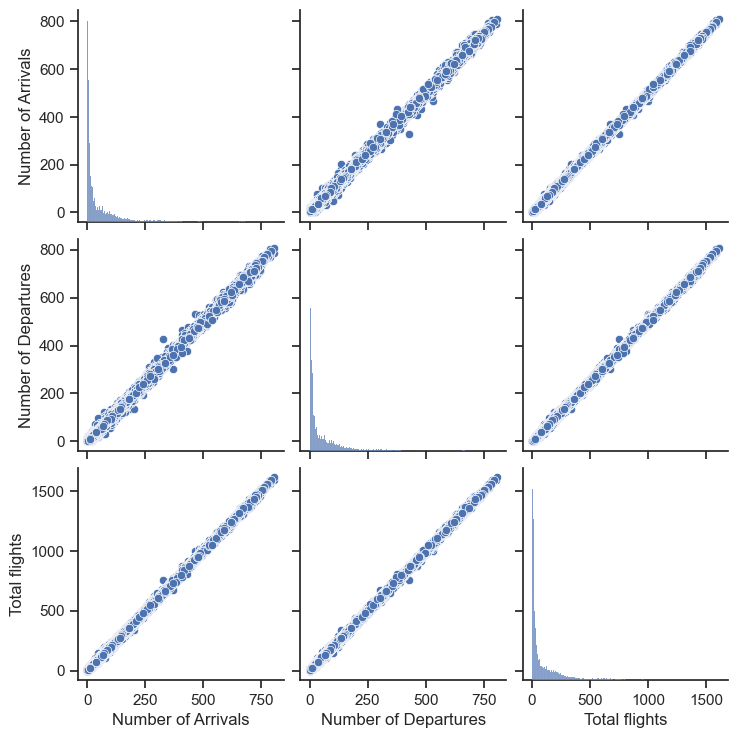

In [256]:
g = sns.pairplot(sub)

In [257]:
# Save the visualization 
g.fig.savefig("Pair Plot", dpi=300, bbox_inches="tight")

# Categorical plot

<Axes: xlabel='Total flights', ylabel='Count'>

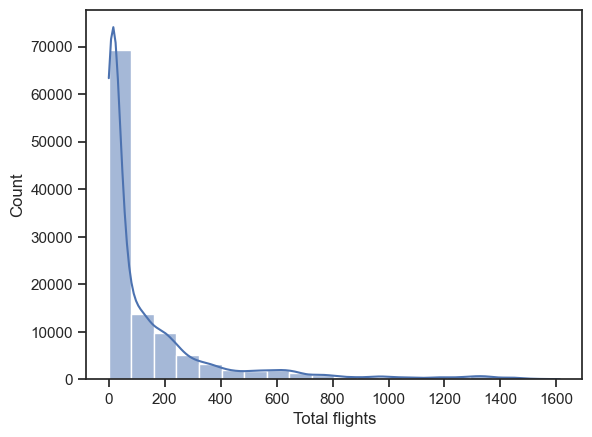

In [258]:
# Check the distribution of the variables
sns.histplot(data['Total flights'], bins = 20, kde = True)

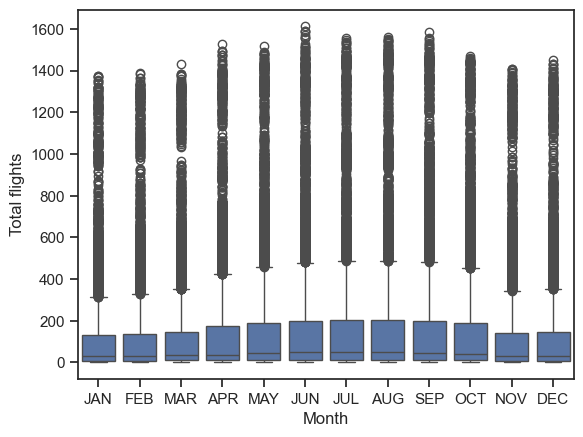

In [259]:
sns.boxplot(x="Month", y="Total flights", data=data)
plt.show()

In [260]:
# Determine the subcategories 

In [261]:
data.loc[data['Total flights'] <= 130, 'Season'] = 'Low season'

In [262]:
data.loc[(data['Total flights'] > 130) & (data['Total flights'] < 150),'Season'] = 'Mid season'

In [263]:
data.loc[data['Total flights'] >= 150, 'Season'] = 'High season'

In [264]:
data['Season'].value_counts(dropna = False)

Season
Low season     78458
High season    30836
Mid season      2898
Name: count, dtype: int64

In [265]:
data.columns

Index(['Month Code', 'Month', 'Flight Date', 'Airport ICAO Code',
       'Airport Name', 'Country', 'Number of Departures', 'Number of Arrivals',
       'Total flights', 'Season'],
      dtype='object')

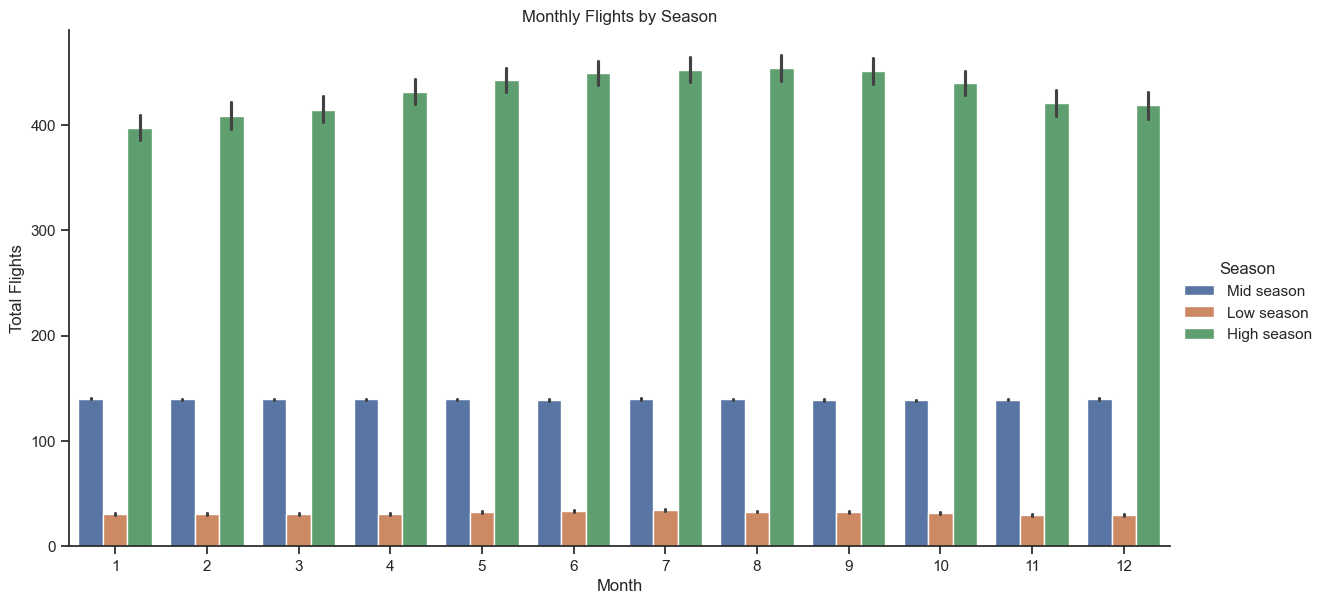

In [266]:
# Create the categorical plot using seaborn  

g = sns.catplot(
    x="Month Code", 
    y="Total flights", 
    hue="Season",         
    data=data,
    kind="bar",            
    height=6, aspect=2
)

g.set_axis_labels("Month", "Total Flights")
plt.title("Monthly Flights by Season")
plt.show()

In [267]:
# Save the visualization 
g.fig.savefig("Categorical Plot Total Flights per Month.png", dpi=300, bbox_inches="tight")

## 3.Research questions

# Which European airports have the highest and lowest total flight traffic in 2024? 

Question to be explored.

# How does total flight traffic vary monthly or seasonally across European airports?

Total flight traffic at European airports shows clear seasonal peaks in summer (July–August), moderate volumes in spring and autumn, and lowest levels in winter. This reflects tourism-driven demand, with significantly more flights in the high season compared to the low season.

# Are there noticeable trends over time (e.g., growth in traffic during certain months)?

Yes, traffic generally increases from winter into summer, peaking in July–August, then declines through autumn before reaching its lowest levels in January–February. This pattern highlights strong seasonal growth in mid-year months driven by holiday travel.

# How does traffic distribution vary by country or region?

Question to be explored.

## 4.Hypotheses

# 1.Traffic distribution will vary significantly by country, with larger or more tourist-focused countries (e.g., Italy, Spain, France) experiencing higher total flights compared to smaller countries.

# 2.There is a consistent growth in total flight traffic from early spring to summer each year, followed by a gradual decline into autumn and winter, reflecting seasonal travel demand.

# 3.Major hub airports (e.g. London Heathrow, Paris CDG, Frankfurt, Amsterdam Schiphol) will have the highest total flight traffic in 2024, while smaller regional airports will have the lowest.